In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [3]:
wages = pd.read_csv("../datasets/wages.csv")

predictors = wages.drop(["wage_per_hour"], axis=1).values
target = wages["wage_per_hour"].values

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

### `early_stopping` with `patience=2` means to stop fitting if there is no decresing in the loss for the following 2 epochs


In [4]:
early_stopping = EarlyStopping(patience=4)

### Complie and fit the model with `loss='mean_squared_error'` for regression

### `validation_split = 0.3`

### `metrics=["accuracy"]` to show the accuracy with each epoch


In [5]:
# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(100, activation="relu", input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(50, activation="relu"))

# Add the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

# Fit the model
model.fit(
    predictors, target, validation_split=0.3, epochs=20, callbacks=[early_stopping]
)

Epoch 1/20
12/12 [==============================] - 2s 33ms/step - loss: 65.2243 - accuracy: 0.0027 - val_loss: 33.2770 - val_accuracy: 0.0000e+00
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 29.0355 - accuracy: 0.0027 - val_loss: 29.1769 - val_accuracy: 0.0000e+00
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 22.1092 - accuracy: 0.0027 - val_loss: 31.8278 - val_accuracy: 0.0000e+00
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 21.0650 - accuracy: 0.0027 - val_loss: 26.4992 - val_accuracy: 0.0000e+00
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 20.4283 - accuracy: 0.0027 - val_loss: 25.7459 - val_accuracy: 0.0000e+00
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 20.1845 - accuracy: 0.0027 - val_loss: 26.1032 - val_accuracy: 0.0000e+00
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 19.9869 - accuracy: 0.0027 - val_loss: 25.1751 - v

## Plot the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6101 (23.83 KB)
Trainable params: 6101 (23.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


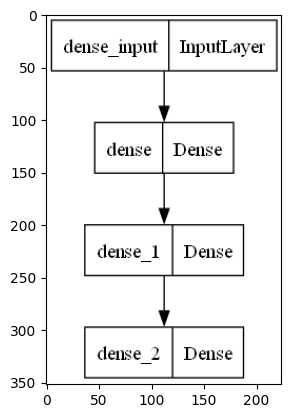

In [10]:
# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='Saved/regression_model.png')

# Display the image
data = plt.imread('Saved/regression_model.png')
plt.imshow(data)
plt.show()